In [18]:
import pandas as pd
import numpy as np

# Se você moveu o arquivo para a pasta correta:
caminho_eventos = '../data/raw/dados_tratados_enchente_francisco_morato - Dados agregados.csv'

# Se o arquivo estiver na raiz (ou pasta atual do notebook):
# caminho_eventos = 'dados_tratados_enchente_francisco_morato - Dados agregados.csv'

# Tente carregar o arquivo
try:
    df_eventos = pd.read_csv(caminho_eventos)
    print("Estrutura do DF de Eventos carregada com sucesso:")
    print(df_eventos.head())

except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado no caminho: {caminho_eventos}")
    print("Verifique se o arquivo está na pasta 'data/raw/' e se o caminho '../data/raw/' está correto.")
    # Se o arquivo estiver na raiz, tente:
    # df_eventos = pd.read_csv('dados_tratados_enchente_francisco_morato - Dados agregados.csv')



Estrutura do DF de Eventos carregada com sucesso:
   UF Município      Foco    Registro                    Protocolo  \
0  SP  Caieiras  Vizinhas  20/02/2020  SP-F-3509007-13214-20200210   
1  SP  Caieiras  Vizinhas  31/01/2022  SP-F-3509007-13214-20220130   
2  SP  Caieiras  Vizinhas  09/10/2023  SP-F-3509007-13214-20231008   
3  SP  Caieiras  Vizinhas  31/12/2024  SP-F-3509007-13214-20241230   
4  SP   Cajamar  Vizinhas  26/01/2023  SP-F-3509205-12300-20230126   

                                             COBRADE           Status  \
0  13214 - Tempestade Local/Convectiva - Chuvas I...  Não reconhecido   
1  13214 - Tempestade Local/Convectiva - Chuvas I...      Reconhecido   
2  13214 - Tempestade Local/Convectiva - Chuvas I...      Reconhecido   
3  13214 - Tempestade Local/Convectiva - Chuvas I...      Reconhecido   
4                                12300 - Alagamentos         Registro   

   População  DH_Mortos  DH_Feridos  ...  PEPL_Segurança pública (R$)  \
0      86623     

In [19]:
# --- DEFINIÇÃO DOS RÓTULOS (Y) ---

# 1. Definir os códigos COBRADE de INUNDAÇÃO (Y=1) que queremos classificar
codigos_enchente = [
    '12100 - Inundações', '12200 - Enxurradas', '12300 - Alagamentos',
    '13214 - Tempestade Local/Convectiva - Chuvas Intensas' 
]

# 2. Filtrar para Francisco Morato (Foco) e Vizinhas, removendo "Tirar da analise"
# A coluna 'Foco' no seu CSV já faz essa triagem.
df_eventos_filtrados = df_eventos[
    (df_eventos['Foco'].isin(['Foco', 'Vizinhas'])) & 
    (df_eventos['COBRADE'].isin(codigos_enchente))
].copy()

# 3. Converter a coluna Registro para data (formato DD/MM/YYYY)
df_eventos_filtrados['DATA_ENCHENTE'] = pd.to_datetime(
    df_eventos_filtrados['Registro'], 
    format='%d/%m/%Y', 
    errors='coerce' # Trata erros de conversão como NaN
)

# 4. Criar a lista final de dias de enchente (os seus rótulos 1)
datas_enchente_unicas = df_eventos_filtrados.dropna(subset=['DATA_ENCHENTE'])
datas_enchente_unicas = datas_enchente_unicas['DATA_ENCHENTE'].dt.date.unique()
datas_enchente_oficiais_unicas = datas_enchente_unicas # <-- Mantenha o nome que você usou
print(f"\n✅ Lista de datas de Enchente (Y=1) pronta. Total de dias únicos: {len(datas_enchente_unicas)}")


✅ Lista de datas de Enchente (Y=1) pronta. Total de dias únicos: 13


In [20]:
df_eventos_filtrados.head()

,UF,Município,Foco,Registro,Protocolo,COBRADE,Status,População,DH_Mortos,DH_Feridos,...,PEPL_Ensino (R$),PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),Unnamed: 54,Franco da Rocha,Vizinhas,DATA_ENCHENTE
0,SP,Caieiras,Vizinhas,20/02/2020,SP-F-3509007-13214-20200210,13214 - Tempestade Local/Convectiva - Chuvas I...,Não reconhecido,86623,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Cajamar,Vizinhas,2020-02-20
1,SP,Caieiras,Vizinhas,31/01/2022,SP-F-3509007-13214-20220130,13214 - Tempestade Local/Convectiva - Chuvas I...,Reconhecido,86623,0,0,...,0.0,0.0,0.0,120000.0,26000.0,50000.0,NaN,Caieiras,Vizinhas,2022-01-31
2,SP,Caieiras,Vizinhas,09/10/2023,SP-F-3509007-13214-20231008,13214 - Tempestade Local/Convectiva - Chuvas I...,Reconhecido,86623,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mairiporã,Vizinhas,2023-10-09
3,SP,Caieiras,Vizinhas,31/12/2024,SP-F-3509007-13214-20241230,13214 - Tempestade Local/Convectiva - Chuvas I...,Reconhecido,86623,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Campo Limpo Paulista,Vizinhas,2024-12-31
4,SP,Cajamar,Vizinhas,26/01/2023,SP-F-3509205-12300-20230126,12300 - Alagamentos,Registro,64113,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jundiaí,Vizinhas,2023-01-26


In [21]:
#Inclusão de eventos não oficiais - noticiados na mídia
#Passo 1: Salvar e Carregar os Dados Não Oficiais
import pandas as pd
import numpy as np

# Caminho para o novo arquivo (Certifique-se que o nome está correto)
caminho_nao_oficial = '../data/raw/eventos_nao_oficiais.csv'

# Carregar o novo arquivo (assumindo que o separador é vírgula)
try:
    df_nao_oficial = pd.read_csv(caminho_nao_oficial, sep=',') 
    print("Estrutura dos Dados Não Oficiais:")
    print(df_nao_oficial.head())
    
except FileNotFoundError:
    print(f"ERRO: O arquivo {caminho_nao_oficial} não foi encontrado. Verifique se você o salvou na pasta 'data/raw/' com o nome correto.")
    # Se der erro, você pode tentar carregar a partir do Excel diretamente, se tiver os pacotes:
    # df_nao_oficial = pd.read_excel(caminho_nao_oficial.replace('.csv', '.xlsx')) 
    # print(df_nao_oficial.head())
    
except Exception as e:
    print(f"Erro ao carregar o CSV não oficial: {e}. Verifique o separador (sep=',' ou sep=';').")
    # Se o separador for ponto e vírgula:

    # df_nao_oficial = pd.read_csv(caminho_nao_oficial, sep=';')

Estrutura dos Dados Não Oficiais:
  Data do Evento  Cidade/Município                       Tipo de Ocorrência
0     03/02/2020  Francisco Morato                               Alagamento
1     10/02/2020  Francisco Morato                   Chuva Intensa / Alerta
2     11/02/2020  Francisco Morato                   Chuva Intensa / Alerta
3     21/02/2020  Francisco Morato  Chuva Forte / Interrupção de Transporte
4     21/02/2020           Jundiaí  Chuva Forte / Interrupção de Transporte


In [22]:
#Passo 2: Limpeza e Extração de Datas
# Colunas reais do seu novo CSV: 'Data do Evento', 'Cidade/Município', 'Tipo de Ocorrência'
COLUNA_DATA = 'Data do Evento' 

# 1. Limpar a coluna de data (assumindo formato DD/MM/YYYY)
df_nao_oficial['DATA_ALERTA'] = pd.to_datetime(
    df_nao_oficial[COLUNA_DATA], 
    format='%d/%m/%Y', 
    errors='coerce' # Converte erros (como '26/12/2024') para NaT
)

# 2. Filtrar datas inválidas e extrair a lista final de dias (apenas a data, sem hora)
datas_nao_oficiais_unicas = df_nao_oficial.dropna(subset=['DATA_ALERTA'])
datas_nao_oficiais_unicas = datas_nao_oficiais_unicas['DATA_ALERTA'].dt.date.unique()

print(f"\n✅ Total de dias únicos de alerta nos dados NÃO OFICIAIS: {len(datas_nao_oficiais_unicas)}")


✅ Total de dias únicos de alerta nos dados NÃO OFICIAIS: 26


In [23]:
#Passo 4: Consolidação Final das Datas de Alerta
# Converte a lista de datas não oficiais para o mesmo tipo de dado (numpy array)
datas_nao_oficiais_array = np.array(datas_nao_oficiais_unicas)
datas_oficiais_array = np.array(datas_enchente_oficiais_unicas)

# Combina as duas listas e remove duplicatas para ter a lista MESTRA
datas_alerta_mestra = np.unique(np.concatenate([datas_oficiais_array, datas_nao_oficiais_array]))

print(f"\n>>> Total FINAL de DIAS DE ALERTA (Y=1) para treinamento: {len(datas_alerta_mestra)}")


>>> Total FINAL de DIAS DE ALERTA (Y=1) para treinamento: 34


In [28]:
import pandas as pd
import numpy as np
import os

# --- VÁRIAVEIS GLOBAIS DE CONFIGURAÇÃO ---
caminho_eventos_oficiais = '../data/raw/dados_tratados_enchente_francisco_morato - Dados agregados.csv'
caminho_eventos_nao_oficiais = '../data/raw/eventos_nao_oficiais.csv' # << VERIFIQUE SE ESTE NOME ESTÁ CORRETO
codigos_alerta = ['12100 - Inundações', '12200 - Enxurradas', '12300 - Alagamentos', '13214 - Tempestade Local/Convectiva - Chuvas Intensas']
cidades_vizinhas_lista = ['Caieiras', 'Cajamar', 'Campo Limpo Paulista', 'Franco da Rocha', 'Mairiporã', 'Jundiaí'] # Cidades Vizinhas para o filtro não-oficial

# --- 1. PROCESSAR DADOS OFICIAIS (S2ID) ---
df_oficial = pd.read_csv(caminho_eventos_oficiais)
df_oficial['DATA_EVENTO'] = pd.to_datetime(df_oficial['Registro'], format='%d/%m/%Y', errors='coerce').dt.date

df_oficial_filtrado = df_oficial[df_oficial['COBRADE'].isin(codigos_alerta)].dropna(subset=['DATA_EVENTO'])

# Datas de Morato (Oficiais)
datas_morato_oficiais = df_oficial_filtrado[df_oficial_filtrado['Foco'] == 'Foco']['DATA_EVENTO'].unique()

# Datas de Vizinhas (Oficiais)
datas_vizinhas_oficiais = df_oficial_filtrado[df_oficial_filtrado['Foco'] == 'Vizinhas']['DATA_EVENTO'].unique()

# --- 2. PROCESSAR DADOS NÃO OFICIAIS (PLANILHA DO USUÁRIO) ---
# Tente carregar com separador vírgula. Se falhar, tente ponto e vírgula (sep=';').
df_nao_oficial = pd.read_csv(caminho_eventos_nao_oficiais, sep=',') 
df_nao_oficial['DATA_EVENTO'] = pd.to_datetime(df_nao_oficial['Data do Evento'], format='%d/%m/%Y', errors='coerce').dt.date
df_nao_oficial = df_nao_oficial.dropna(subset=['DATA_EVENTO'])

# Datas de Morato (Não Oficiais)
# Usa .str.contains para pegar qualquer variação do nome
df_morato_nao_oficial = df_nao_oficial[df_nao_oficial['Cidade/Município'].str.contains('Francisco Morato', na=False)]
datas_morato_nao_oficiais = df_morato_nao_oficial['DATA_EVENTO'].unique()

# Datas de Vizinhas (Não Oficiais)
# Filtra as cidades vizinhas e remove Morato para evitar duplicidade
df_vizinhas_nao_oficial = df_nao_oficial[df_nao_oficial['Cidade/Município'].isin(cidades_vizinhas_lista)].copy()
df_vizinhas_nao_oficial = df_vizinhas_nao_oficial[~df_vizinhas_nao_oficial['Cidade/Município'].str.contains('Francisco Morato', na=False)]
datas_vizinhas_nao_oficiais = df_vizinhas_nao_oficial['DATA_EVENTO'].unique()


# --- 3. CONSOLIDAÇÃO FINAL (As 3 listas necessárias) ---

# 1. RÓTULO DE HISTÓRICO (APENAS MORATO)
datas_morato_unicas = np.unique(np.concatenate([datas_morato_oficiais, datas_morato_nao_oficiais]))

# 2. RÓTULO DE HISTÓRICO (APENAS VIZINHAS)
datas_vizinhas_unicas = np.unique(np.concatenate([datas_vizinhas_oficiais, datas_vizinhas_nao_oficiais]))

# 3. RÓTULO MESTRE (Y) - Combina TUDO
datas_alerta_mestra = np.unique(np.concatenate([datas_morato_unicas, datas_vizinhas_unicas]))

print(f"✅ Variáveis de data de alerta definidas.")
print(f"- Morato Histórico (RISCO_HIST_FM): {len(datas_morato_unicas)} dias")
print(f"- Vizinhas Histórico (RISCO_HIST_VZ): {len(datas_vizinhas_unicas)} dias")
print(f"- Rótulo Mestre Y (TARGET_ENCHENTE): {len(datas_alerta_mestra)} dias")

✅ Variáveis de data de alerta definidas.
- Morato Histórico (RISCO_HIST_FM): 13 dias
- Vizinhas Histórico (RISCO_HIST_VZ): 24 dias
- Rótulo Mestre Y (TARGET_ENCHENTE): 34 dias


# Tratamento dados cemaden

In [29]:
import pandas as pd
import numpy as np
import os
import glob 

# --- VARIÁVEIS DE CONFIGURAÇÃO BASEADAS NO SEU CSV ---
PASTA_RAW = '../data/raw/'
CAMINHO_ARQUIVOS_CEMADEN = os.path.join(PASTA_RAW, 'PED_Cemaden_3516309*A.csv')

# Nomes reais das colunas no seu CSV:
COLUNA_DATA_REAL = 'datahora'
COLUNA_CHUVA_REAL = 'valor'
FORMATO_DATA_REAL = '%Y-%m-%d %H:%M:%S'
ID_SENSOR_PRECIPITACAO = 240 # ID 240 é o código padrão para Precipitação em mm

arquivos_cemaden = glob.glob(CAMINHO_ARQUIVOS_CEMADEN)
df_chuva_consolidado = pd.DataFrame()

print(f"Iniciando a consolidação de {len(arquivos_cemaden)} arquivos...")

for arquivo in arquivos_cemaden:
    try:
        sensor_id = os.path.basename(arquivo).split('_')[-1].replace('.csv', '')
        
        # Carrega o CSV: separador ',', cabeçalho na primeira linha
        df_sensor = pd.read_csv(arquivo, sep=',') 
        
        # 1. FILTRAR APENAS PELO SENSOR DE PRECIPITAÇÃO (ID 240)
        df_sensor = df_sensor[df_sensor['id_sensor'] == ID_SENSOR_PRECIPITACAO].copy()

        # 2. Renomear e Selecionar Colunas
        df_sensor = df_sensor.rename(columns={
            COLUNA_DATA_REAL: 'DATA_HORA',  
            COLUNA_CHUVA_REAL: f'CHUVAMM_{sensor_id}' # Coluna de valor renomeada com o ID do sensor
        })
        
        # 3. Limpeza de Tempo e Conversão
        df_sensor = df_sensor[['DATA_HORA', f'CHUVAMM_{sensor_id}']].copy()
        df_sensor['DATA_HORA'] = pd.to_datetime(df_sensor['DATA_HORA'], format=FORMATO_DATA_REAL, errors='coerce')
        df_sensor = df_sensor.set_index('DATA_HORA').dropna()
        
        # 4. Conversão Final e Filtro
        df_sensor[f'CHUVAMM_{sensor_id}'] = pd.to_numeric(df_sensor[f'CHUVAMM_{sensor_id}'], errors='coerce')
        df_sensor = df_sensor[df_sensor[f'CHUVAMM_{sensor_id}'] >= 0]
        
        # 5. Junta com o DF principal
        if df_chuva_consolidado.empty:
            df_chuva_consolidado = df_sensor
        else:
            df_chuva_consolidado = df_chuva_consolidado.join(df_sensor, how='outer')

    except Exception as e:
        print(f"Erro ao processar o arquivo {arquivo}: {e}")

print(f"\n✅ Consolidação de {len(arquivos_cemaden)} sensores concluída.")
print("Amostra das primeiras linhas:")
print(df_chuva_consolidado.head())

Iniciando a consolidação de 6 arquivos...

✅ Consolidação de 6 sensores concluída.
Amostra das primeiras linhas:
                     CHUVAMM_351630901A  CHUVAMM_351630902A  \
DATA_HORA                                                     
2020-01-01 00:00:00                 NaN                 NaN   
2020-01-01 00:10:00                 0.0                 NaN   
2020-01-01 00:20:00                 NaN                 0.0   
2020-01-01 00:30:00                 NaN                 NaN   
2020-01-01 00:40:00                 NaN                 NaN   

                     CHUVAMM_351630903A  CHUVAMM_351630904A  \
DATA_HORA                                                     
2020-01-01 00:00:00                 NaN                 NaN   
2020-01-01 00:10:00                 NaN                 NaN   
2020-01-01 00:20:00                 NaN                 NaN   
2020-01-01 00:30:00                 0.0                 NaN   
2020-01-01 00:40:00                 NaN                 0.0   

   

In [30]:
# 1. CRIAÇÃO DA FEATURE PRINCIPAL: CHUVA MÁXIMA HORÁRIA EM FRANCISCO MORATO
# Usar o máximo entre os 6 sensores garante que capturamos o ponto de chuva mais intensa na cidade.
chuva_cols = [col for col in df_chuva_consolidado.columns if col.startswith('CHUVAMM_')]
df_final = df_chuva_consolidado.copy()
df_final['PRECIPITACAO_MAX_FM'] = df_final[chuva_cols].max(axis=1)
df_final = df_final[['PRECIPITACAO_MAX_FM']].copy() # Foca apenas na coluna combinada

# 2. CRIAÇÃO DAS FEATURES DE ACUMULADO (ROLLING WINDOW)
janelas = [3, 6, 12, 24] # Acumulados em horas
for janela in janelas:
    df_final[f'Chuva_FM_{janela}h'] = df_final['PRECIPITACAO_MAX_FM'].rolling(window=janela, min_periods=janela).sum()

# 3. FEATURE DE BACIA/VIZINHAS (Manter o placeholder, se você não tiver os dados de Franco da Rocha)
df_final['Chuva_Vizinha_6h'] = 0.0 

# 4. CRIAÇÃO DA VARIÁVEL TARGET (Y)
janela_alerta = 48 # Alerta para o que pode ocorrer nas próximas 24 horas.

# -------------------------- CORREÇÃO AQUI ---------------------------
# Correção: Usar np.isin() para verificar se a data (np.array) do índice
# está presente nas datas únicas de enchente (np.array).
df_final['Houve_Enchente_No_Dia'] = np.isin(
    df_final.index.date, 
    datas_alerta_mestra
).astype(int)

# --------------------------------------------------------------------

# O 'shift' negativo traz o evento futuro para o passado (onde o alerta é emitido).
df_final['TARGET_ENCHENTE'] = df_final['Houve_Enchente_No_Dia'].shift(-janela_alerta)

# 5. Limpeza Final
df_final = df_final.dropna()
df_final['TARGET_ENCHENTE'] = df_final['TARGET_ENCHENTE'].astype(int)
df_final = df_final.drop(columns=['Houve_Enchente_No_Dia', 'PRECIPITACAO_MAX_FM']) 

print("\n✅ Base de dados final pronta para ML (Features X e Rótulo Y).")
print("Total de horas na base final:", len(df_final))
print("Amostra da base final (últimas 5 linhas):")
print(df_final.tail())


✅ Base de dados final pronta para ML (Features X e Rótulo Y).
Total de horas na base final: 241564
Amostra da base final (últimas 5 linhas):
                     Chuva_FM_3h  Chuva_FM_6h  Chuva_FM_12h  Chuva_FM_24h  \
DATA_HORA                                                                   
2025-10-01 13:20:00          0.0          0.0           0.0           0.0   
2025-10-01 13:30:00          0.0          0.0           0.0           0.0   
2025-10-01 13:40:00          0.0          0.0           0.0           0.0   
2025-10-01 13:50:00          0.0          0.0           0.0           0.0   
2025-10-01 14:00:00          0.0          0.0           0.0           0.0   

                     Chuva_Vizinha_6h  TARGET_ENCHENTE  
DATA_HORA                                               
2025-10-01 13:20:00               0.0                0  
2025-10-01 13:30:00               0.0                0  
2025-10-01 13:40:00               0.0                0  
2025-10-01 13:50:00              

In [32]:
# --- FASE 2.2: CRIAÇÃO FINAL DAS FEATURES X e Y ---

# ... (Seu código de criação das features de chuva [Chuva_FM_...], continua igual)
# O DF 'df_final' neste ponto deve ter as colunas Chuva_FM_3h, Chuva_FM_6h, etc.

# JANELA DE DESLOCAMENTO (Shift)
janela_historico = 24 # 24 horas de antecedência

# 1. Feature: Houve enchente ou alerta em Morato no dia anterior?
df_final['Houve_Alerta_Morato_Hoje'] = np.isin(
    df_final.index.date, 
    datas_morato_unicas
).astype(int)
# Desloca a informação para trás, tornando-a uma feature de histórico (risco)
df_final['RISCO_HIST_FM'] = df_final['Houve_Alerta_Morato_Hoje'].shift(janela_historico)


# 2. Feature: Houve enchente ou alerta em Cidades Vizinhas no dia anterior?
df_final['Houve_Alerta_Vizinha_Hoje'] = np.isin(
    df_final.index.date, 
    datas_vizinhas_unicas
).astype(int)
# Desloca a informação para trás, tornando-a uma feature de histórico (risco)
df_final['RISCO_HIST_VZ'] = df_final['Houve_Alerta_Vizinha_Hoje'].shift(janela_historico)


# 3. CRIAÇÃO DA VARIÁVEL TARGET (Y) (Usando a lista MESTRA de todos os eventos)
janela_alerta = 48 # Mantenha 48 horas para maior chance de acerto

# Y MESTRE: Traz o evento FUTURO (Y) para o horário ATUAL (X)
df_final['Houve_Enchente_No_Dia'] = np.isin(
    df_final.index.date, 
    datas_alerta_mestra # <-- Usando a lista consolidada (oficial + não-oficial)
).astype(int)
df_final['TARGET_ENCHENTE'] = df_final['Houve_Enchente_No_Dia'].shift(-janela_alerta)


# 4. Limpeza Final
df_final = df_final.dropna()
df_final['TARGET_ENCHENTE'] = df_final['TARGET_ENCHENTE'].astype(int)
df_final = df_final.drop(columns=[
    'Houve_Enchente_No_Dia', 
    'Houve_Alerta_Morato_Hoje',
    'Houve_Alerta_Vizinha_Hoje',
    'Chuva_Vizinha_6h' # Remove o placeholder
]) 

print("\n✅ Base de dados com FEATURES DE RISCO HISTÓRICO prontas.")
print("Novas Features X:", ['RISCO_HIST_FM', 'RISCO_HIST_VZ'])
print("Total de horas na base final:", len(df_final))


✅ Base de dados com FEATURES DE RISCO HISTÓRICO prontas.
Novas Features X: ['RISCO_HIST_FM', 'RISCO_HIST_VZ']
Total de horas na base final: 241420


C:\Users\JoaoH\AppData\Local\Temp\ipykernel_17324\795857253.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['TARGET_ENCHENTE'] = df_final['TARGET_ENCHENTE'].astype(int)


In [33]:
df_final.head()

,Chuva_FM_3h,Chuva_FM_6h,Chuva_FM_12h,Chuva_FM_24h,TARGET_ENCHENTE,RISCO_HIST_FM,RISCO_HIST_VZ
DATA_HORA,,,,,,,
2020-01-01 14:00:00,0.0,0.0,2.0,2.0,0,0.0,0.0
2020-01-01 14:10:00,0.0,0.0,2.0,2.0,0,0.0,0.0
2020-01-01 14:20:00,0.0,0.0,1.0,2.0,0,0.0,0.0
2020-01-01 14:30:00,0.0,0.0,1.0,2.0,0,0.0,0.0
2020-01-01 14:50:00,0.0,0.0,1.0,2.0,0,0.0,0.0


# Fase 3: Treinamento e Avaliação do Modelo


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Garanta que todas as bibliotecas estão carregadas

# 1. SEPARAÇÃO X e Y (Features e Target)
# Inclui todas as features de Chuva Acumulada e as novas de Risco Histórico
features_cols = [
    col for col in df_final.columns 
    if col.startswith('Chuva_FM_') or col.startswith('RISCO_HIST_')
]

X = df_final[features_cols].values # Matriz de entrada
y = df_final['TARGET_ENCHENTE'].values # Vetor de saída (0 ou 1)

print(f"Total de amostras na base de dados: {len(X)}")
print(f"Número de eventos de alerta (TARGET=1): {y.sum()}")
print(f"Colunas (Features X) usadas: {features_cols}")

# Divisão Treino/Teste (estratificada, para garantir Y=1 em ambos)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.05, 
    random_state=42, 
    stratify=y
)

# 2. TREINAMENTO DO MODELO (class_weight='balanced' é crucial)
modelo = RandomForestClassifier(
    n_estimators=200, 
    random_state=42, 
    class_weight='balanced', 
    max_depth=10, 
    n_jobs=-1
)

print("\nIniciando o treinamento do Random Forest com Rótulos Expandidos...")
modelo.fit(X_train, y_train)
print("✅ Treinamento concluído!")

Total de amostras na base de dados: 241420
Número de eventos de alerta (TARGET=1): 4278
Colunas (Features X) usadas: ['Chuva_FM_3h', 'Chuva_FM_6h', 'Chuva_FM_12h', 'Chuva_FM_24h', 'RISCO_HIST_FM', 'RISCO_HIST_VZ']

Iniciando o treinamento do Random Forest com Rótulos Expandidos...
✅ Treinamento concluído!



--- MATRIZ DE CONFUSÃO (Diagnóstico Pós-Expansão) ---
[[Verdadeiro Negativo (0) | Falso Positivo (Alarme Falso)]
 [Falso Negativo (Falha de Alerta) | Verdadeiro Positivo (Alerta Correto)]]
[[11519   338]
 [   58   156]]

--- RELATÓRIO DE CLASSIFICAÇÃO ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11857
           1       0.32      0.73      0.44       214

    accuracy                           0.97     12071
   macro avg       0.66      0.85      0.71     12071
weighted avg       0.98      0.97      0.97     12071



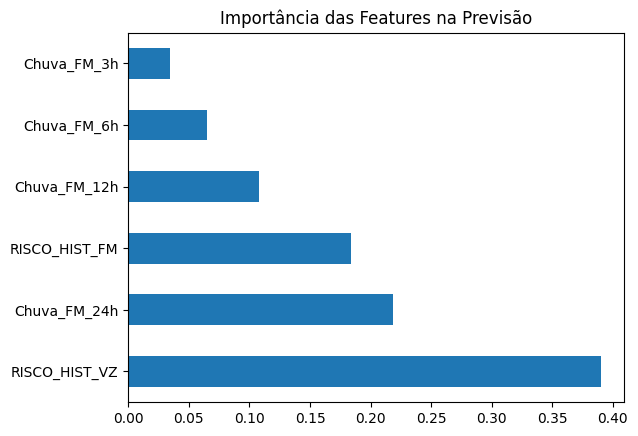

In [35]:
#2. Avaliação e Análise de Resultados
# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# --- MATRIZ DE CONFUSÃO ---
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n--- MATRIZ DE CONFUSÃO (Diagnóstico Pós-Expansão) ---")
print("[[Verdadeiro Negativo (0) | Falso Positivo (Alarme Falso)]")
print(" [Falso Negativo (Falha de Alerta) | Verdadeiro Positivo (Alerta Correto)]]")
print(conf_matrix)

# --- RELATÓRIO DE CLASSIFICAÇÃO (Métricas) ---
print("\n--- RELATÓRIO DE CLASSIFICAÇÃO ---")
print(classification_report(y_test, y_pred))

# 3. Análise da Importância das Features
feature_importances = pd.Series(modelo.feature_importances_, index=features_cols)
feature_importances.sort_values(ascending=False).plot(kind='barh', title='Importância das Features na Previsão')
plt.show()

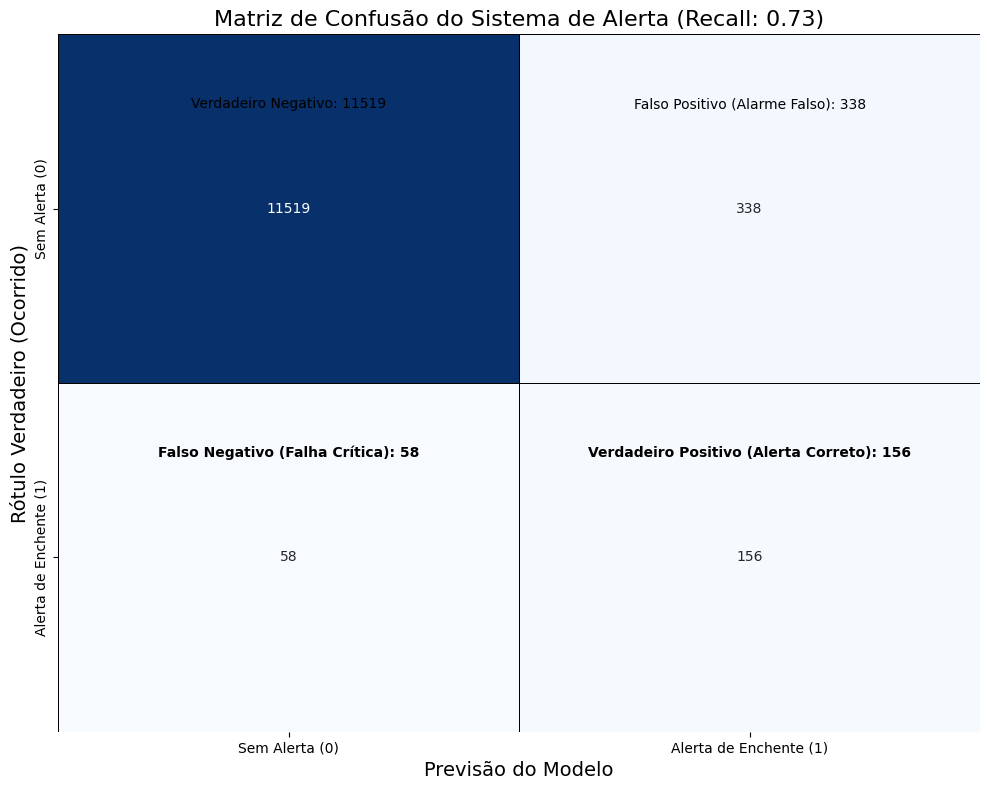

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- DADOS AUTOMÁTICOS ---
# A Matriz de Confusão: conf_matrix[linha, coluna]
# conf_matrix = [[11519, 338], [58, 156]]
TN, FP, FN, TP = conf_matrix.ravel() # Desempacota a matriz em 4 variáveis

# Cálculo Automático do Recall e Precision (para fins de exibição no gráfico)
recall_class_1 = TP / (TP + FN)
precision_class_1 = TP / (TP + FP)

# Formatação dos textos para o gráfico
texto_fn = f'Falso Negativo (Falha Crítica): {FN}'
texto_tp = f'Verdadeiro Positivo (Alerta Correto): {TP}'
texto_fp = f'Falso Positivo (Alarme Falso): {FP}'
texto_tn = f'Verdadeiro Negativo: {TN}'

# 1. Configurar os Rótulos e Título
nomes_classes = ['Sem Alerta (0)', 'Alerta de Enchente (1)']

# 2. Criar o Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix, 
    annot=True,              # Mostrar os valores dentro das células
    fmt='d',                 # Formatar como inteiros
    cmap='Blues',            
    xticklabels=nomes_classes, 
    yticklabels=nomes_classes,
    linewidths=.5,           # Linhas para separar células
    linecolor='black',
    cbar=False               # Remove a barra de cor, já que os números são a informação principal
)

# 3. Adicionar Títulos e Rótulos
plt.title(f'Matriz de Confusão do Sistema de Alerta (Recall: {recall_class_1:.2f})', fontsize=16)
plt.ylabel('Rótulo Verdadeiro (Ocorrido)', fontsize=14)
plt.xlabel('Previsão do Modelo', fontsize=14)

# 4. Inserir a interpretação dos resultados diretamente no gráfico
# Adiciona a interpretação em texto (mais claro para a apresentação)
plt.text(0.5, 0.2, texto_tn, horizontalalignment='center', verticalalignment='center', color='black', fontsize=10)
plt.text(1.5, 0.2, texto_fp, horizontalalignment='center', verticalalignment='center', color='black', fontsize=10)
plt.text(0.5, 1.2, texto_fn, horizontalalignment='center', verticalalignment='center', color='black', fontsize=10, weight='bold')
plt.text(1.5, 1.2, texto_tp, horizontalalignment='center', verticalalignment='center', color='black', fontsize=10, weight='bold')

plt.tight_layout() # Ajusta o layout para não cortar elementos
plt.show()